In [22]:
import os
import pandas as pd

path2data = "./data/"

path2labels = os.path.join(path2data, "pick_locations.csv")
labels_df = pd.read_csv(path2labels, index_col = "id")

# Drop 0 values from the labels
# labels_df = labels_df.replace(0, None)
# labels_df.dropna

# Check that the correct data labels have been imported
# T = Training, V = Validation, E = Evaluation
labels_df.head()

,img_name,pick_x,pick_y
id,,,
1,T0001.jpg,801,324
2,T0002.jpg,538,313
3,T0003.jpg,751,437
4,T0004.jpg,948,334
5,T0005.jpg,879,768


In [23]:
labels_df.tail()

,img_name,pick_x,pick_y
id,,,
121,V0121.jpg,1031,968
122,V0122.jpg,518,769
123,V0123.jpg,496,901
124,V0124.jpg,290,1169
125,V0125.jpg,257,1237


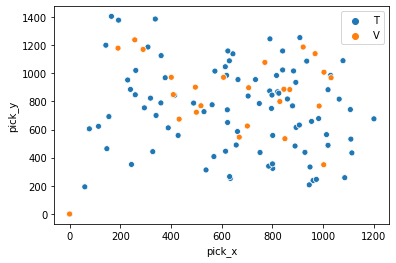

In [24]:
# Check the random distribution of the plectrums in the image data
import seaborn as sns
%matplotlib inline

AorN = [imn[0] for imn in labels_df.img_name]
sns.scatterplot(x = labels_df['pick_x'], y = labels_df['pick_y'], hue = AorN)

In [25]:
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pylab as plt

# Set the seed for numpy random func
np.random.seed(2020)

In [26]:
plt.rcParams['figure.figsize'] = (15, 3)
plt.subplots_adjust(wspace = 0, hspace = 0.3)
nrows, ncols = 2, 3

<Figure size 1080x216 with 0 Axes>

In [27]:
img_name = labels_df["img_name"]
ids = labels_df.index
rand_ids = np.random.choice(ids, nrows * ncols)
print(rand_ids)

[ 97   9  68 119  68  92]


In [28]:
def load_img_label(labels_df, id_):
    img_name = labels_df["img_name"]
    if img_name[id_][0] == "T":
        prefix = "training"
    else:
        prefix = "val"
    image_path = os.path.join(path2data, prefix, img_name[id_])
    img = Image.open(image_path)
    x = labels_df["pick_x"][id_]
    y = labels_df["pick_y"][id_]
    label = (x, y)
    return img, label

In [29]:
def show_img_label(img, label, w_h = (50, 50), thickness = 2):
    w, h = w_h
    cx, cy = label
    draw = ImageDraw.Draw(img)
    draw.rectangle(((cx-w/2, cy-h/2), (cx+w/2, cy+h/2)), outline="green", width=thickness)
    plt.imshow(np.asarray(img))

(1600, 1200) (840, 1023)
(1600, 1200) (789, 874)
(1600, 1200) (820, 868)
(1600, 1200) (0, 0)
(1600, 1200) (820, 868)
(1600, 1200) (1109, 532)


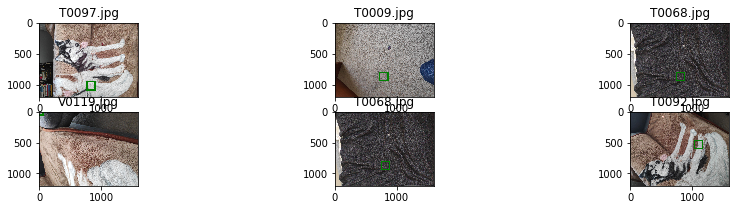

In [30]:
for i, id_ in enumerate(rand_ids):
    img, label = load_img_label(labels_df, id_)
    print(img.size, label)
    plt.subplot(nrows, ncols, i + 1)
    show_img_label(img, label, w_h=(150, 150), thickness=20)
    plt.title(img_name[id_])